<a href="https://colab.research.google.com/github/Pestrdan/netology_research/blob/main/Keras/%D0%9A%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D0%BE%D0%B5_%D0%B7%D1%80%D0%B5%D0%BD%D0%B8%D0%B5/CVML_12_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Загружаем исходные данные

In [ ]:
train = np.loadtxt('train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('test.csv', delimiter=',', skiprows=1)

In [ ]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

## Вычисляем X и Y составляющие градиента с помощью оператора Собеля

In [ ]:
train_sobel_x = np.zeros_like(train_img)
train_sobel_y = np.zeros_like(train_img)
for i in range(len(train_img)):
    train_sobel_x[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    train_sobel_y[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

In [ ]:
test_sobel_x = np.zeros_like(test_img)
test_sobel_y = np.zeros_like(test_img)
for i in range(len(test_img)):
    test_sobel_x[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    test_sobel_y[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

## Вычисляем угол и длину вектора градиента

In [ ]:
train_g, train_theta = cv2.cartToPolar(train_sobel_x, train_sobel_y)

In [ ]:
test_g, test_theta = cv2.cartToPolar(test_sobel_x, test_sobel_y)

## Вычисляем гистограммы градиентов

In [ ]:
# Гистограммы вычисляются с учетом длины вектора градиента
train_hist = np.zeros((len(train_img), 16))
for i in range(len(train_img)):
    hist, borders = np.histogram(train_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i])
    train_hist[i] = hist

In [ ]:
test_hist = np.zeros((len(test_img), 16))
for i in range(len(test_img)):
    hist, borders = np.histogram(test_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i])
    test_hist[i] = hist

## Нормируем вектор гистограммы

In [ ]:
# По умолчанию используется L2 норма
train_hist = train_hist / np.linalg.norm(train_hist, axis=1)[:, None]

In [ ]:
test_hist = test_hist / np.linalg.norm(test_hist, axis=1)[:, None]

## Разбиваем выборку на обучение и валидацию

In [ ]:
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_hist, test_size=0.2,
    random_state=42)

## Выбираем модель

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
accuracy_score(y_train, model_lr.predict(x_train))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5824107142857143

In [ ]:
accuracy_score(y_val, model_lr.predict(x_val))

0.5770238095238095

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier(random_state=42)
model_dtc.fit(x_train, y_train)
accuracy_score(y_train, model_dtc.predict(x_train))

1.0

In [ ]:
accuracy_score(y_val, model_dtc.predict(x_val))

0.48964285714285716

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(random_state=42)
model_rfc.fit(x_train, y_train)
accuracy_score(y_train, model_rfc.predict(x_train))

1.0

In [ ]:
accuracy_score(y_val, model_rfc.predict(x_val))

0.6433333333333333

In [ ]:
result = model_rfc.predict(test_hist)
result

array([2., 5., 9., ..., 3., 9., 3.])

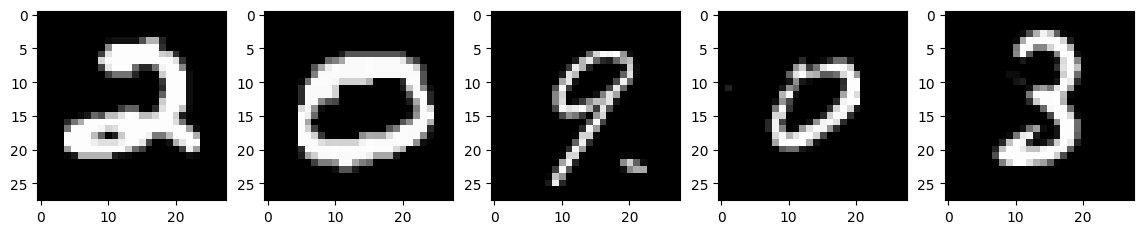

In [ ]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame()

In [ ]:
len(result)

28000

In [ ]:
ImageId = list(range(1, 28001))

In [ ]:
len(ImageId)

28000

In [ ]:
Label = []
for i in result:
  Label.append(int(i))

In [ ]:
df['ImageId'] = ImageId

In [ ]:
df['Label'] = Label

In [ ]:
df

,ImageId,Label
0,1,2
1,2,5
2,3,9
3,4,0
4,5,8
...,...,...
27995,27996,9
27996,27997,4
27997,27998,3
27998,27999,9


In [ ]:
df.to_csv('sample_submission.csv', index= False )